<a href="https://colab.research.google.com/github/fawaz-alsaif/fawaz-alsaif.github.io/blob/master/_posts/KPMG_Virtual_Internship_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KPMG Data Analytics - Virtual Internship Program**
# **Activity 1 - Assessing data quality**

Sprocket Central Pty Ltd , a medium size bikes & cycling accessories organisation, has approached Tony Smith (Partner) in KPMG’s Lighthouse & Innovation Team. Sprocket Central Pty Ltd  is keen to learn more about KPMG’s expertise in its Analytics, Information & Modelling team.

Smith discusses KPMG’s expertise in this space (you can read more here). In particular, he speaks about how the team can effectively analyse the datasets to help Sprocket Central Pty Ltd grow its business.

Primarily, Sprocket Central Pty Ltd needs help with its customer and transactions data. The organisation has a large dataset relating to its customers, but their team is unsure how to effectively analyse it to help optimise its marketing strategy.

However, in order to support the analysis, you speak to the Associate Director for some ideas and she advised that “the importance of optimising the quality of customer datasets cannot be underestimated. The better the quality of the dataset, the better chance you will be able to use it drive company growth.”

The client provided KPMG with 3 datasets:

* Customer Demographic
* Customer Addresses
* Transactions data in the past 3 months


You decide to start the preliminary data exploration and identify ways to improve the quality of Sprocket Central Pty Ltd’s data.

# I- The task at hand

You arrive at your desk after the initial client meeting. You have a voicemail on your phone which contains the following instructions.

“Hi there – Welcome again to the team! The client has asked our team to assess the quality of their data; as well as make recommendations on ways to clean the underlying data and mitigate these issues.  Can you please take a look at the datasets we’ve received and draft an email to them identifying the data quality issues and how this may impact our analysis going forward?

I will send through an example of a typical data quality framework that can be used as a guide. Remember to consider the join keys between the tables too. Thanks again for your help.”


### Subsequently, you receive the below email
-----------------------------------------------------------------------------
Hi there,

As per voicemail, please find the 3 datasets attached from Sprocket Central Pty Ltd:

Customer Demographic
Customer Addresses
Transaction data in the past three months
Can you please review the data quality to ensure that it is ready for our analysis in phase two. Remember to take note of any assumptions or issues we need to go back to the client on. As well as recommendations going forward to mitigate current data quality concerns.

I’ve also attached a data quality framework as a guideline. Let me know if you have any questions.

Thanks for your help.

Kind Regards

Your Manager

-----------------------------------------------------------------------------
-----------------------------------------------------------------------------


Hence the task at hand is to draft an email to the client identifying the data quality issues and strategies to mitigate these issues. Refer to ‘Data Quality Framework Table’ and resources below for criteria and dimensions which you should consider.

You may use programs like Excel, Google Sheets, Tableau, Power BI to start. Feel free to use Python, R Programming Language, MatLab and other data analytics tools that you know of.




# II- Import the necessary packages

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import files


In [16]:
pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 72.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=48ff06d8e149efe80da127a95498a950821abe698ee2886acfa5773b543f9914
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [3]:
uploaded = files.upload()

Saving KPMG_VI_New_raw_data_update_final.xlsx to KPMG_VI_New_raw_data_update_final.xlsx


In [9]:
demographics = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = "CustomerDemographic", header=1)
addresses = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = "CustomerAddress",header = 1)
transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = "Transactions", header = 1)
cust_list = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = "NewCustomerList", header = 1)

<ipython-input-9-64b81ea8c31e>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  demographics = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = "CustomerDemographic", header=1)
<ipython-input-9-64b81ea8c31e>:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  cust_list = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = "NewCustomerList", header = 1)


Now that all the data is loaded into pandas DataFrame formats, we will examin them in the lense of data quality to uncover any data issues we may encounter.

these issues may come under the following:


1.   Accuracy: Correct values
2.   Completeness: Data fields with values
3.   Consistency: Values free from contradictions
4.   Currency: Values up to date
5.   Relevency: Data items with Value Meta-Data
6.   Validity: Data containing allowable Values
7.   Uniqueness: Records that are duplicated



## 1- Demographics DataFrame

Let's first generate data dictionary to clarify the column names and data types.

In [22]:
column_names = list(demographics.columns)
data_types = demographics.dtypes.tolist()
description = [""] * len(column_names)  # Add descriptions for each column if available

# Create the data dictionary DataFrame
data_dictionary = pd.DataFrame({
    'Column Name': column_names,
    'Data Type': data_types,
    'Description': description
})

# Display the data dictionary

print(data_dictionary)

                            Column Name       Data Type Description
0                           customer_id           int64            
1                            first_name          object            
2                             last_name          object            
3                                gender          object            
4   past_3_years_bike_related_purchases           int64            
5                                   DOB  datetime64[ns]            
6                             job_title          object            
7                 job_industry_category          object            
8                        wealth_segment          object            
9                    deceased_indicator          object            
10                              default          object            
11                             owns_car          object            
12                               tenure         float64            


In [21]:
column_names = list(demographics.columns)

# Display the column names
print("Column names:", column_names)

Column names: ['customer_id', 'first_name', 'last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'default', 'owns_car', 'tenure']


Let's display the top rows of the data frame so we can have a quick visual assessmeent of the data.

In [10]:
demographics.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


let's get the dataframe info.

In [20]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

We can observe that there are many

In [13]:
n_lines, n_columns = demographics.shape
print(f"the number of lines in this DF is {n_lines}")
print(f"the number of columns in this DF is {n_columns}")

the number of lines in this DF is 4000
the number of columns in this DF is 13


In [24]:
from pandas_profiling import ProfileReport

# Generate the profiling report
profile = ProfileReport(demographics)

# Save the report as an HTML file
profile.to_file('demographics_report.html')

# Download the HTML file
files.download('demographics_report.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
num_duplicates = demographics.duplicated().sum()
num_missing = demographics.isna().sum()
print("Number of duplicate records:", num_duplicates)
print("Number of missing records:")
print("--------------------------")
print(num_missing)
print("--------------------------")
print("% of missing records:")
print(round(num_missing/demographics.shape[0]*100,2))

Number of duplicate records: 0
Number of missing records:
--------------------------
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64
--------------------------
% of missing records:
customer_id                             0.00
first_name                              0.00
last_name                               3.12
gender                                  0.00
past_3_years_bike_related_purchases     0.00
DOB                                     2.17
job_title               

In [28]:
demographics['DOB'].describe()

<ipython-input-28-ba068285cdd7>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  demographics['DOB'].describe()


count                    3913
unique                   3448
top       1978-01-30 00:00:00
freq                        7
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

From our observation of the demographics section of the dataset, we can observe the following:

* Accuracy: Correct values

    The "default" column seems to be mostly incorrect with very un-recognizable formats. We would like to confirm this column satatus. Otherwise, it is better to drop it altoguether if unnecessary.

* Completeness: Data fields with values
  
    There are 1763 missing values in this data frame, which represent 3.4% of total cells. especially:
    - last_name has 125 (3.1%) missing values
    - DOB has 87 (2.2%) missing values
    - job_title has 506 (12.7%) missing values
    - job_industry_category has 656 (16.4%) missing values
    - default has 302 (7.5%) missing values
    - tenure has 87 (2.2%) missing values

* Validity: Data containing allowable Values
    We noticed that one of the clients' date of birth was 1843-12-21. It could be worth getting the right data or dropping this data line if not impactful for the analysis.


* Uniqueness:

    - There are no duplicated records in this dataframe
    - The customer_id column has unique values, which is a good indication of the data quality.




## Missing values by column - Demographics Data Frame

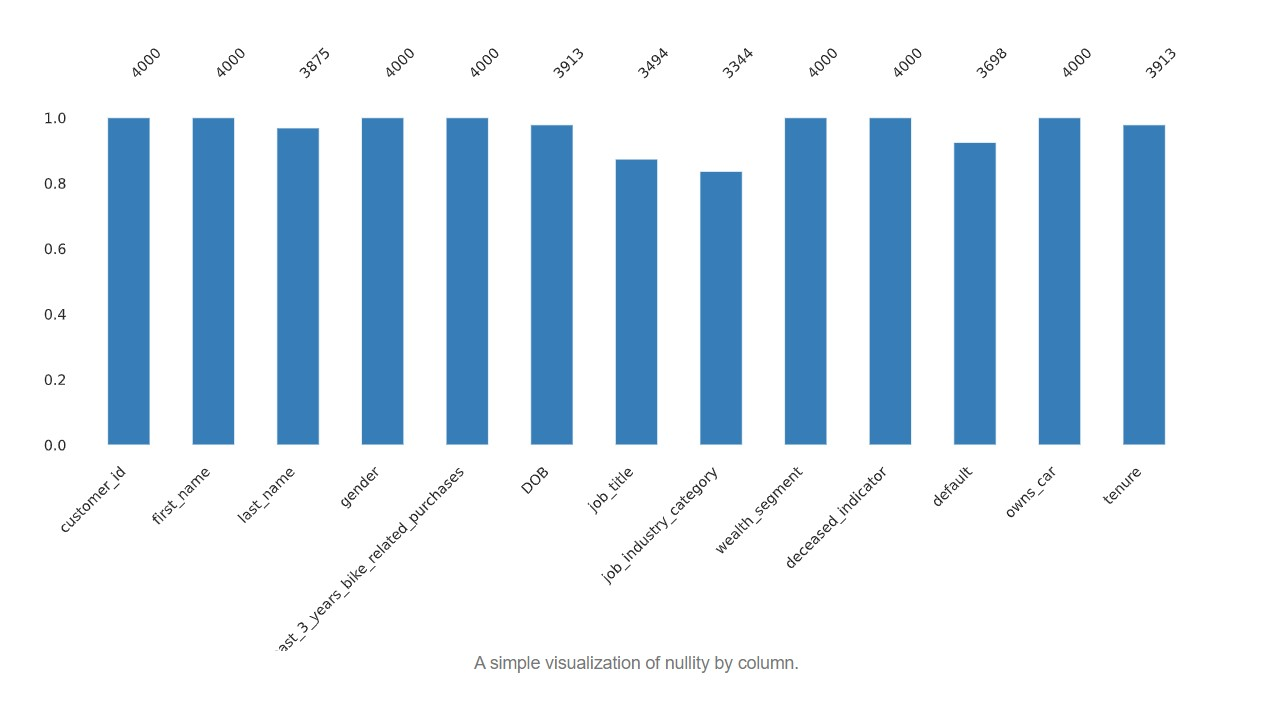

## 2- Customer Addresses DataFrame

Let's first generate data dictionary to clarify the column names and data types.

In [29]:
column_names = list(addresses.columns)
data_types = addresses.dtypes.tolist()
description = [""] * len(column_names)  # Add descriptions for each column if available

# Create the data dictionary DataFrame
data_dictionary = pd.DataFrame({
    'Column Name': column_names,
    'Data Type': data_types,
    'Description': description
})

# Display the data dictionary

print(data_dictionary)

          Column Name Data Type Description
0         customer_id     int64            
1             address    object            
2            postcode     int64            
3               state    object            
4             country    object            
5  property_valuation     int64            


In [30]:
column_names = list(addresses.columns)

# Display the column names
print("Column names:", column_names)

Column names: ['customer_id', 'address', 'postcode', 'state', 'country', 'property_valuation']


Let's display the top rows of the data frame so we can have a quick visual assessmeent of the data.

Let's display the top rows of the data frame so we can have a quick visual assessmeent of the data.

In [31]:
addresses.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


let's get the dataframe info.

In [32]:
addresses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


We can observe that there are many

In [33]:
n_lines, n_columns = addresses.shape
print(f"the number of lines in this DF is {n_lines}")
print(f"the number of columns in this DF is {n_columns}")

the number of lines in this DF is 3999
the number of columns in this DF is 6


In [34]:
from pandas_profiling import ProfileReport

# Generate the profiling report
profile = ProfileReport(addresses)

# Save the report as an HTML file
profile.to_file('addresses_report.html')

# Download the HTML file
files.download('addresses_report.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
num_duplicates = addresses.duplicated().sum()
num_missing = addresses.isna().sum()

print("Number of duplicate records:", num_duplicates)
print("Number of missing records:")
print("--------------------------")
print(num_missing)

print("--------------------------")
print("% of missing records:")
print(round(num_missing/addresses.shape[0]*100,2))

Number of duplicate records: 0
Number of missing records:
--------------------------
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64
--------------------------
% of missing records:
customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64


From our observation of the adresses section of the dataset, we can observe the following:

* Uniqueness:

    - There are no duplicated records in this dataframe
    - The country is "Australia" for all clients. This information should be dropped for the rest of the analysis.





## 3- Transactions Addresses DataFrame

Let's first generate data dictionary to clarify the column names and data types.

In [37]:
column_names = list(transactions.columns)
data_types = transactions.dtypes.tolist()
description = [""] * len(column_names)  # Add descriptions for each column if available

# Create the data dictionary DataFrame
data_dictionary = pd.DataFrame({
    'Column Name': column_names,
    'Data Type': data_types,
    'Description': description
})

# Display the data dictionary

print(data_dictionary)

                Column Name       Data Type Description
0            transaction_id           int64            
1                product_id           int64            
2               customer_id           int64            
3          transaction_date  datetime64[ns]            
4              online_order         float64            
5              order_status          object            
6                     brand          object            
7              product_line          object            
8             product_class          object            
9              product_size          object            
10               list_price         float64            
11            standard_cost         float64            
12  product_first_sold_date         float64            


In [38]:
column_names = list(transactions.columns)

# Display the column names
print("Column names:", column_names)

Column names: ['transaction_id', 'product_id', 'customer_id', 'transaction_date', 'online_order', 'order_status', 'brand', 'product_line', 'product_class', 'product_size', 'list_price', 'standard_cost', 'product_first_sold_date']


In [39]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [40]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [41]:
n_lines, n_columns = transactions.shape
print(f"the number of lines in this DF is {n_lines}")
print(f"the number of columns in this DF is {n_columns}")

the number of lines in this DF is 20000
the number of columns in this DF is 13


In [44]:
from pandas_profiling import ProfileReport

# Generate the profiling report
profile = ProfileReport(transactions)

# Save the report as an HTML file
profile.to_file('transactions_report.html')

# Download the HTML file
files.download('transactions_report.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
num_duplicates = transactions.duplicated().sum()
num_missing = transactions.isna().sum()

print("Number of duplicate records:", num_duplicates)
print("Number of missing records:")
print("--------------------------")
print(num_missing)
print("--------------------------")
print("% of missing records:")
print(round(num_missing/transactions.shape[0]*100, 2))

Number of duplicate records: 0
Number of missing records:
--------------------------
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64
--------------------------
% of missing records:
transaction_id             0.00
product_id                 0.00
customer_id                0.00
transaction_date           0.00
online_order               1.80
order_status               0.00
brand                      0.98
product_line               0.98
product_class              0.98
product_size               0.98
list_price                 0.00
standard_cost              0.98
product_first_sold_date    0.98
dtype: float64


From our observation of the transactions section of the dataset, we can observe the following:

* Completeness: Data fields with values
  
    There are 	1542 missing values in this data frame, which represent 0.6% of total cells. especially:

    - online_order has 360 (1.8%) missing values
    - product_id has 1378 (6.9%) zeros
    - Brand, product_line, product_class, product_size, standard_cost & product_first_sold_date all have the same amount of missing values (197) accounting for 0.98% for the data in each column. Upon visual examination of the data, it seems like these are all related. It could be worth investigating the 197 occurences and why they happened, and retrieve the related data if possible




* Uniqueness:

    There are no duplicated records in this dataframe






## Missing values by column - Transaction Data Frame



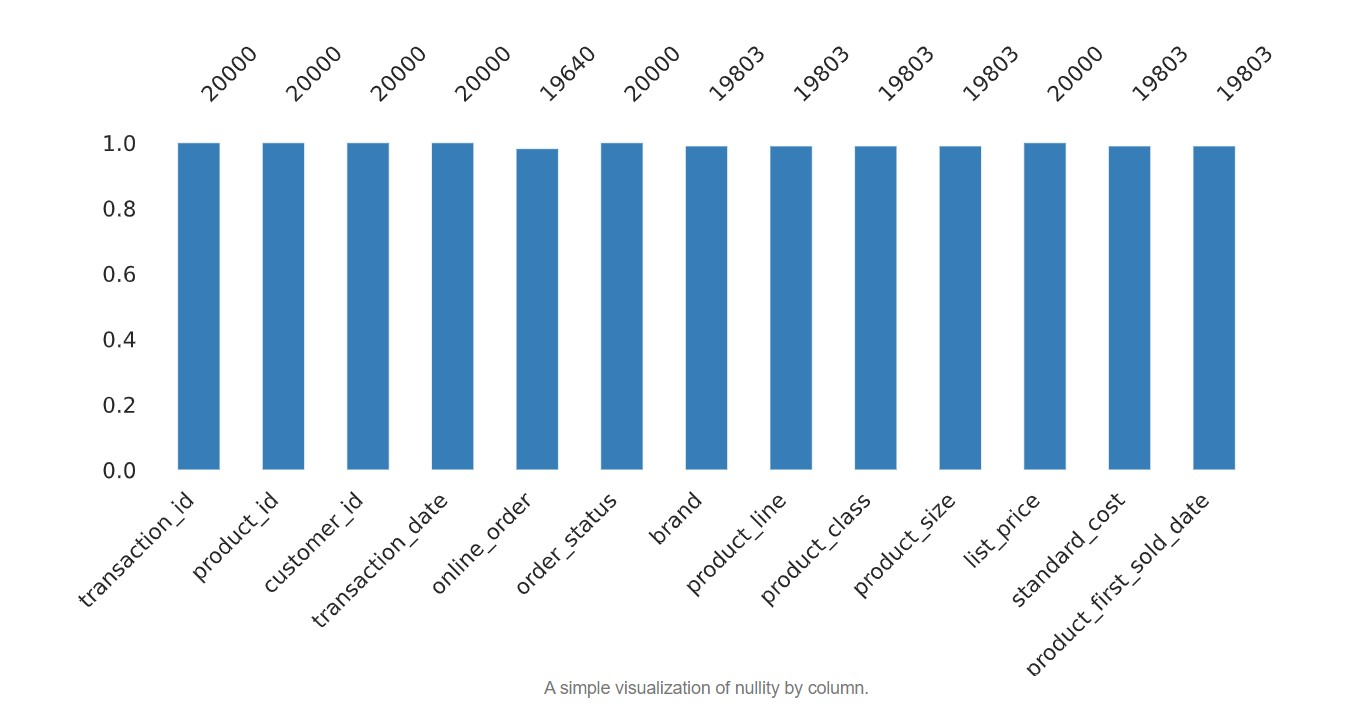

## 4- Findings summary

### Transactions data

* Completeness:
  
    There are 	1542 missing values in this data frame, which represent 0.6% of total cells. especially:

    - online_order has 360 (1.8%) missing values
    - product_id has 1378 (6.9%) zeros
    - Brand, product_line, product_class, product_size, standard_cost & product_first_sold_date all have the same amount of missing values (197) accounting for 0.98% for the data in each column. Upon visual examination of the data, it seems like these are all related. It could be worth investigating the 197 occurences and why they happened, and retrieve the related data if possible.

* Uniqueness:

    There are no duplicated records in this dataframe






### Demographics data

* Accuracy:

    The "default" column seems to be mostly incorrect with very un-recognizable formats. We would like to confirm this column satatus. Otherwise, it is better to drop it altoguether if unnecessary.

* Completeness:
  
    There are 1763 missing values in this data frame, which represent 3.4% of total cells. especially:
    - last_name has 125 (3.1%) missing values
    - DOB has 87 (2.2%) missing values
    - job_title has 506 (12.7%) missing values
    - job_industry_category has 656 (16.4%) missing values
    - default has 302 (7.5%) missing values
    - tenure has 87 (2.2%) missing values

* Validity:
    We noticed that one of the clients' date of birth was 1843-12-21. It could be worth getting the right data or dropping this data line if not impactful for the analysis.


* Uniqueness:

    - There are no duplicated records in this dataframe
    - The customer_id column has unique values, which is a good indication of the data quality.



### Addresses data

From our observation of the transactions section of the dataset, we can observe the following:

* Completeness:

There are 1542 missing values in this data frame, which represent 0.6% of total cells. especially:

online_order has 360 (1.8%) missing values
product_id has 1378 (6.9%) zeros
Brand, product_line, product_class, product_size, standard_cost & product_first_sold_date all have the same amount of missing values (197) accounting for 0.98% for the data in each column. Upon visual examination of the data, it seems like these are all related. It could be worth investigating the 197 occurences and why they happened, and retrieve the related data if possible.